In [21]:
from MLSpear import *
import numpy as np
import matplotlib.pyplot as plt

In [22]:
Model = Neural_Network([Batch_Normalization(), Tanh(2, 8), PReLU(8, 8), Softmax(8, 1)], 
                       print_error = True)

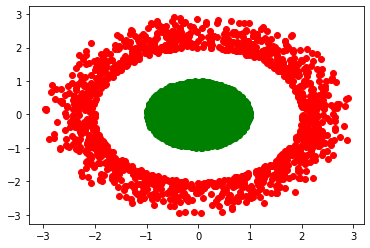

In [23]:
#Classification (Non Linear)
Points = np.random.randn(10000, 2)
Green = [] 
Red   = []

for point in Points:
    x = point[0]
    y = point[1]
    
    r = np.sqrt(x ** 2 + y ** 2)
    if r < 1:
        Green.append([x, y])
    if r > 2 and r < 3:
        Red.append([x, y])
    
Green = np.array(Green)
Red = np.array(Red)

plt.scatter(Green[:,0], Green[:,1], color = 'green')
plt.scatter(Red[:, 0], Red[:, 1], color = 'red')
plt.show()

X = np.vstack((Green, Red))
Y = np.zeros((X.shape[0], 1))
Y[0:Green.shape[0], 0] = 1

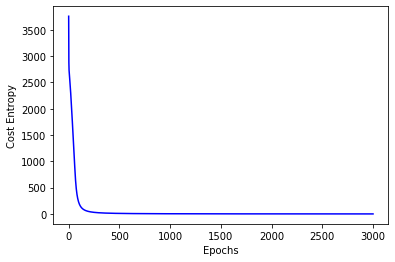

In [29]:
Model.train(X, Y, 3000, 0.0001, batch_size = X.shape[0])

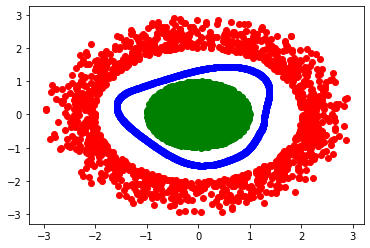

In [30]:
#Plot Decision boundary
Boundary = []
for x in np.linspace(-3, 3, 1000):
    for y in np.linspace(-3, 3, 1000):
        p = np.array([x, y])
        P = Model.predict(p)
        if np.abs(P - 0.5) < 0.01:
            Boundary.append([x, y])

Boundary = np.array(Boundary)
plt.scatter(Boundary[:, 0], Boundary[:, 1], color = 'blue')
plt.scatter(Green[:, 0], Green[:, 1], color = 'green')
plt.scatter(Red[:, 0], Red[:, 1], color = 'red')
plt.show()


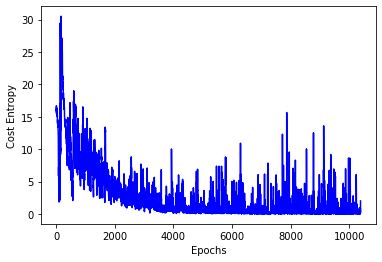

In [6]:
Model.train(X, Y, 2, 0.001, mu = 0.001, optimizer = 'rmsprop') 
# To add momentum, simply include the mtype parameter, set it to either 'nesterov' or 'conventional',
# and set mu to a number between 0 and 1.

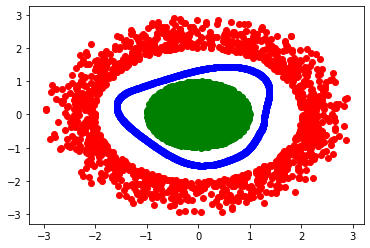

In [31]:
#Plot Decision boundary
Boundary = []
for x in np.linspace(-3, 3, 1000):
    for y in np.linspace(-3, 3, 1000):
        p = np.array([x, y])
        P = Model.predict(p)
        if np.abs(P - 0.5) < 0.01:
            Boundary.append([x, y])

Boundary = np.array(Boundary)
plt.scatter(Boundary[:, 0], Boundary[:, 1], color = 'blue')
plt.scatter(Green[:, 0], Green[:, 1], color = 'green')
plt.scatter(Red[:, 0], Red[:, 1], color = 'red')
plt.show()

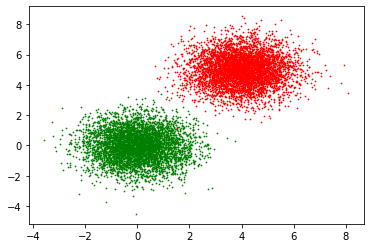

In [8]:
#Regression
Green = np.random.randn(5000, 2)
Red   = np.random.randn(5000, 2) + np.array([4, 5])

plt.scatter(Green[:,0], Green[:,1], color = 'green', s = 0.5)
plt.scatter(Red[:, 0], Red[:, 1], color = 'red', s = 0.5)
plt.show()

Data = np.vstack((Green, Red))
X = Data[:,0].reshape((Data[:,0].shape[0], 1))
Y = Data[:,1].reshape((Data[:,1].shape[0], 1))

In [11]:
Model = Neural_Network([Regression(1, 1)], print_error = True)

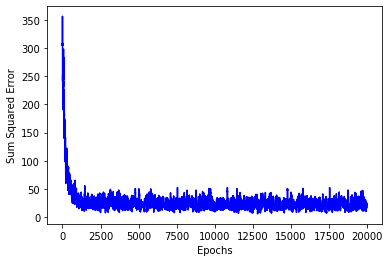

In [12]:
Model.train(X, Y, 2, 0.00001)

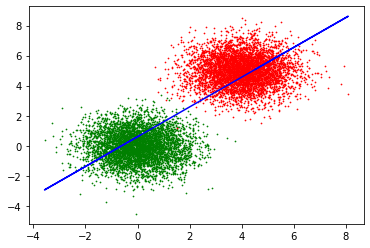

In [13]:
Y_hat = Model.predict(X)
plt.plot(X, Y_hat, color = 'blue')
plt.scatter(Green[:,0], Green[:,1], color = 'green', s = 0.5)
plt.scatter(Red[:, 0], Red[:, 1], color = 'red', s = 0.5)
plt.show()

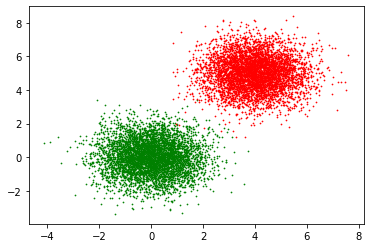

In [14]:
# Logistic Regression
Green = np.random.randn(5000, 2)
Red   = np.random.randn(5000, 2) + np.array([4, 5])

plt.scatter(Green[:,0], Green[:,1], color = 'green', s = 0.5)
plt.scatter(Red[:, 0], Red[:, 1], color = 'red', s = 0.5)
plt.show()

X = np.vstack((Green, Red))
Y = np.zeros((X.shape[0], 1))
Y[0:Green.shape[0], 0] = 1


In [18]:
Model = Neural_Network([Softmax(2, 1)], print_error = True)

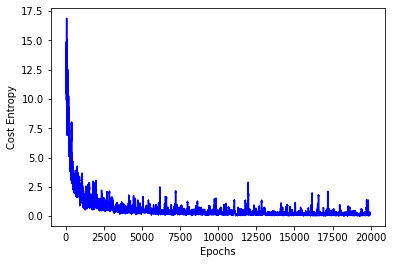

In [19]:
Model.train(X, Y, 2, 0.001)

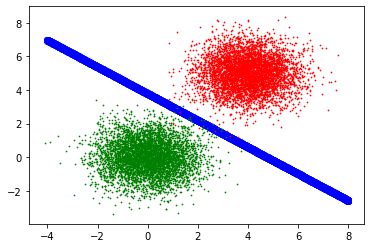

In [20]:
#Plot Decision boundary
Boundary = []
for x in np.linspace(-4, 8, 1000):
    for y in np.linspace(-4, 8, 1000):
        p = np.array([x, y])
        P = Model.predict(p)
        if np.abs(P - 0.5) < 0.01:
            Boundary.append([x, y])

Boundary = np.array(Boundary)
plt.scatter(Boundary[:, 0], Boundary[:, 1], color = 'blue')
plt.scatter(Green[:, 0], Green[:, 1], color = 'green', s = 0.5)
plt.scatter(Red[:, 0], Red[:, 1], color = 'red', s = 0.5)
plt.show()